In [20]:
# No sample adjustment - baseline logistic regression - MinMax tag data


In [21]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [22]:
# module for resampling
from sklearn.utils import resample

In [23]:
# os.getcwd()

In [24]:
# os.listdir(os.getcwd())

In [25]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_merged_reduced.csv")
all_param_df.shape


(31576, 357)

In [26]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [27]:
y_class

0        1
1        0
2        0
3        0
4        0
        ..
31571    0
31572    0
31573    0
31574    0
31575    0
Name: suc_class, Length: 31576, dtype: int64

In [28]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [29]:
x_data.shape

(31576, 346)

In [30]:
#label encode the developer name

In [31]:
x_data['developer']=x_data['developer'].astype('category')

In [32]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18189,Valve,999,90,602,5337,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18189,Valve,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18189,Valve,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18189,Valve,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6672,Valve,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#label encode the publisher name

In [34]:
x_data['publisher']=x_data['publisher'].astype('category')

In [35]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18189,15309,999,90,602,5337,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18189,15309,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18189,15309,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18189,15309,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6672,15309,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [37]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [39]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [40]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

In [41]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test_scaled, y_test)}")

Training Data Score: 0.9787180136812769
Testing Data Score: 0.976817836331391


In [42]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7686
           1       0.73      0.19      0.30       208

    accuracy                           0.98      7894
   macro avg       0.85      0.60      0.65      7894
weighted avg       0.97      0.98      0.97      7894



In [43]:
# thinking about baseline results:
# Support is not balanced - 9700 fail cases vs 205 success
# Percision: for no success: 98%, for successful games: 70%
# Recall: Fraction of positives found, 100% for 0, 15% for 1
# f1 score: 98% due to overfitting on failure cases

<AxesSubplot:>

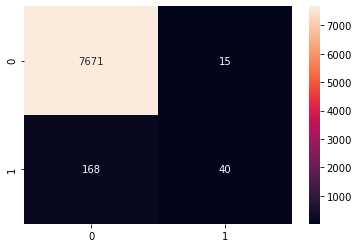

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test_scaled )
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [45]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
141,tagsingleplayer,4.595460
62,tagopenworld,4.088551
170,tagviolent,3.698864
7,tagadventure,3.021049
11,tagrpg,2.853107
16,tagsimulation,2.671233
14,tagearlyaccess,2.605097
156,taggore,2.582516
87,tagmmorpg,2.477552
0,metascore,2.354456
